In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/raw/JobWanted.csv")

# Overview

## 查看集合中的总记录数

In [3]:
total_records = df.shape[0]
print(f"总记录数: {total_records}")

总记录数: 430664


## 抽样查看

In [4]:
df.head()

,JobTitle,city,salary,experience,education,company,companyType
0,e6f7b3df750c0155107f4aba490189caHn,K445,5-6K,EdD,GI,company_623498,type_BLfSmG
1,a3202d97cc6cef462c3e13473afdd30axs,K445,15-30K·15薪,EdD,Gx,company_728898,type_NKZQoO
2,02833b5e80d1bedec819210bc4b3ea26WV,K445,5-8K,EdD,GI,company_653468,type_BPRUkx
3,ad1ef9fc91583a99747340c810ba7eb2nV,K445,4-7K·13薪,EdD,GI,company_387472,type_NKZQoO
4,0d8ddc02b14ab0c4998cc33cb729b85ccn,K445,8-12K,Eqh,Gx,company_712558,type_QbeiZo


## 按职位名称统计招聘信息数

In [5]:
job_title_counts = df["JobTitle"].value_counts().reset_index()
job_title_counts.columns = ["JobTitle", "JobCount"]

In [6]:
job_title_counts

,JobTitle,JobCount
0,bfbc45b05c5a4425210cd2cb3d84ae09GC,3358
1,c9a30a5443d04270fb0f49d437c3376bAy,2633
2,9e7afc7cdb61931eb7d2cc8398b80ecfSQ,2036
3,6be068c4e74275ca8ed9975805e2f763Em,2035
4,2006631955b0aa1d8a3bc1edc55e0754sn,1874
...,...,...
169535,120795c7131bebc756933f3f6fb38663Lh,1
169536,d456f10d730ca34f1c703ff7dc9f84e7Pg,1
169537,7176aa5b3bd1b6267e703839e7465594ZB,1
169538,fd4678b829ff151d4a82ff5050bd76cdMW,1


本作品依据招聘通知数量对原始数据中各职位进行排序。排序结果显示，有 148201 个职位仅具有一条招聘广告，数据具有极强的长尾效应。由于难以从招聘通知数量过少的数据中分析出有意义的信息，最终选取在招聘通知数量排序中前 1% 的职位作为分析对象。

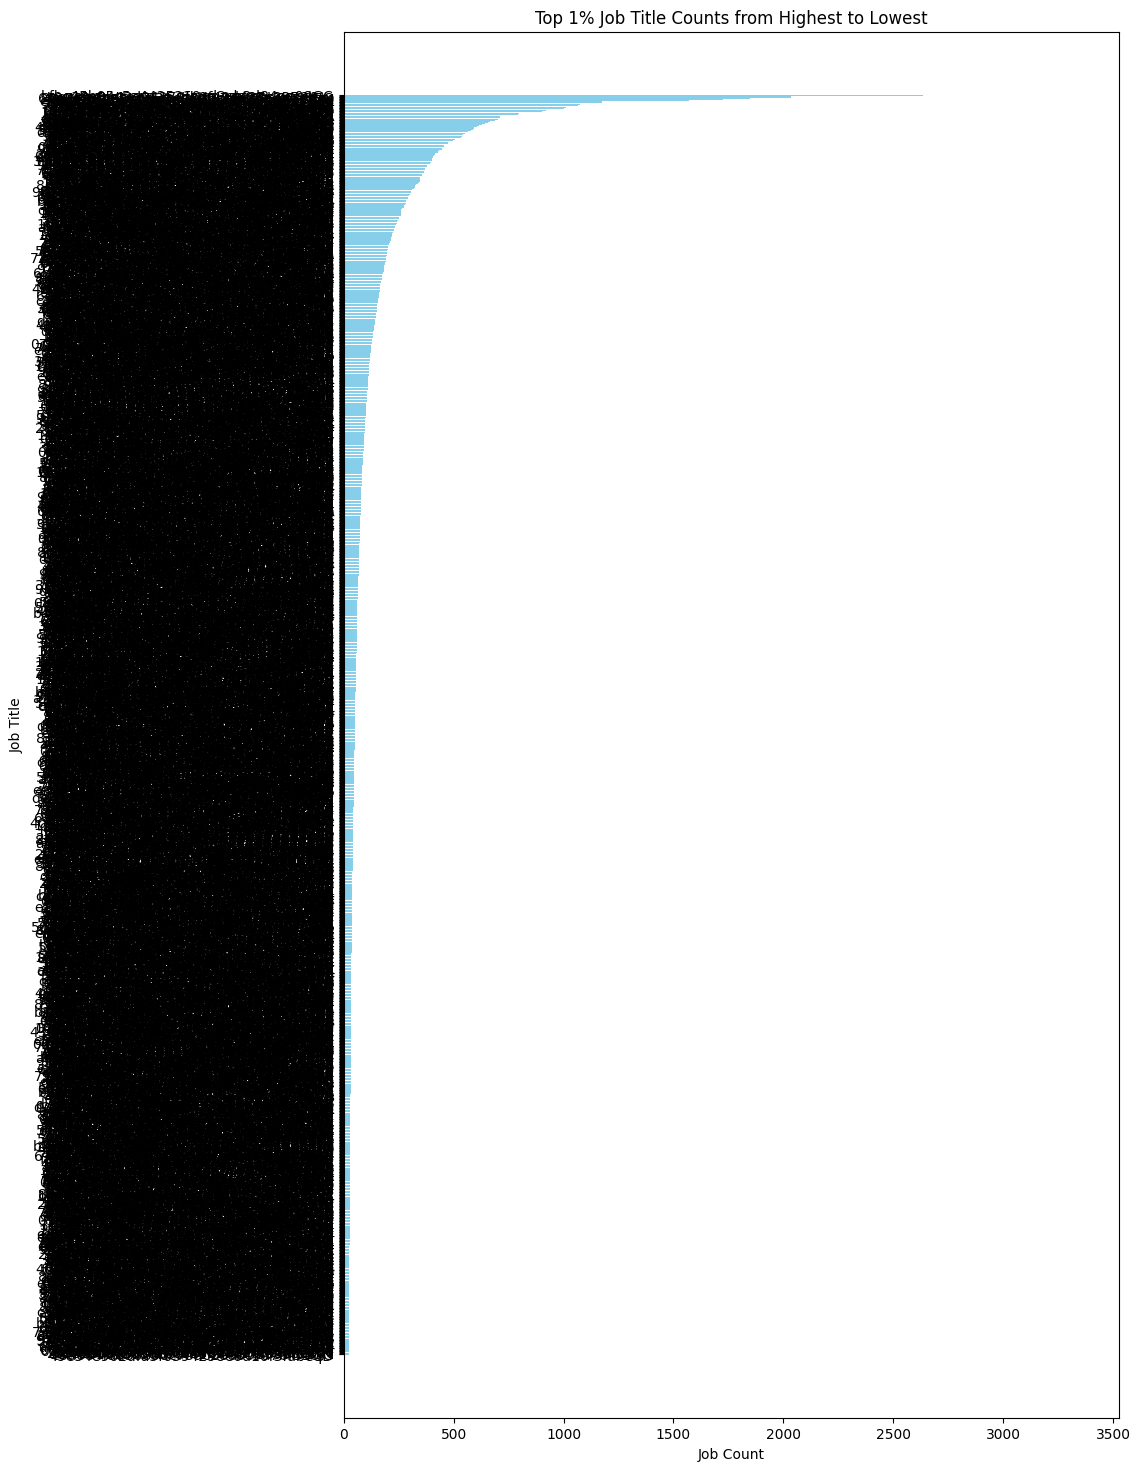

In [7]:
top_1_percent_count = int(len(job_title_counts) * 0.01)
top_1_percent_job_titles = job_title_counts.head(top_1_percent_count)
plt.figure(figsize=(10, 2 ^ 16))
top_1_percent_job_titles = top_1_percent_job_titles.sort_values(
    by="JobCount", ascending=False
)
plt.barh(
    top_1_percent_job_titles["JobTitle"],
    top_1_percent_job_titles["JobCount"],
    color="skyblue",
)
plt.xlabel("Job Count")
plt.ylabel("Job Title")
plt.title("Top 1% Job Title Counts from Highest to Lowest")
plt.gca().invert_yaxis()
plt.show()

## 按行政区划统计招聘信息数

In [8]:
city_counts = df["city"].value_counts().reset_index()
city_counts.columns = ["city", "JobCount"]

In [9]:
city_counts

,city,JobCount
0,F047,25780
1,P949,24682
2,K115,24608
3,F379,24523
4,Y232,24378
...,...,...
366,M732,37
367,B249,28
368,G762,20
369,Z530,19


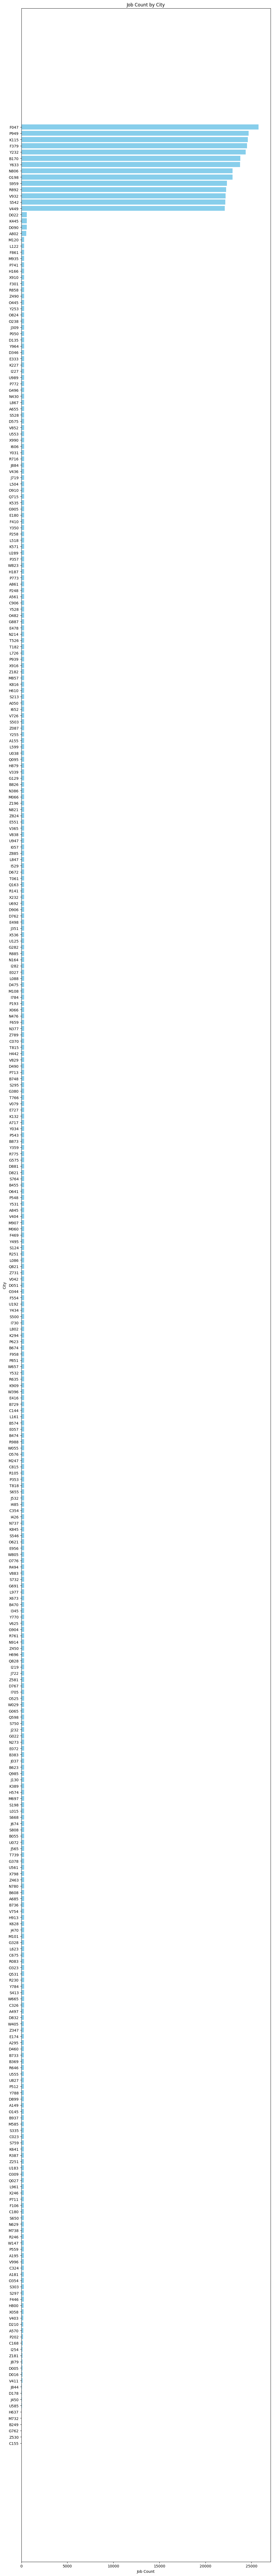

In [10]:
plt.figure(figsize=(12, len(city_counts) / 3))
city_counts = city_counts.sort_values(by="JobCount", ascending=False)
plt.barh(city_counts["city"], city_counts["JobCount"], color="skyblue")
plt.xlabel("Job Count")
plt.ylabel("City")
plt.title("Job Count by City")
plt.gca().invert_yaxis()
plt.show()

## 按行业类别统计招聘信息数

In [11]:
industry_counts = df["companyType"].value_counts().reset_index()
industry_counts.columns = ["companyType", "JobCount"]

In [12]:
industry_counts

,companyType,JobCount
0,type_BLfSmG,21579
1,type_lOdYUb,21087
2,type_uTAWZv,19677
3,type_qrSFSq,18785
4,type_CbBLwi,13685
...,...,...
153,type_CiMmHM,12
154,type_ylOZvC,9
155,type_PeStkD,8
156,type_IkixkP,4


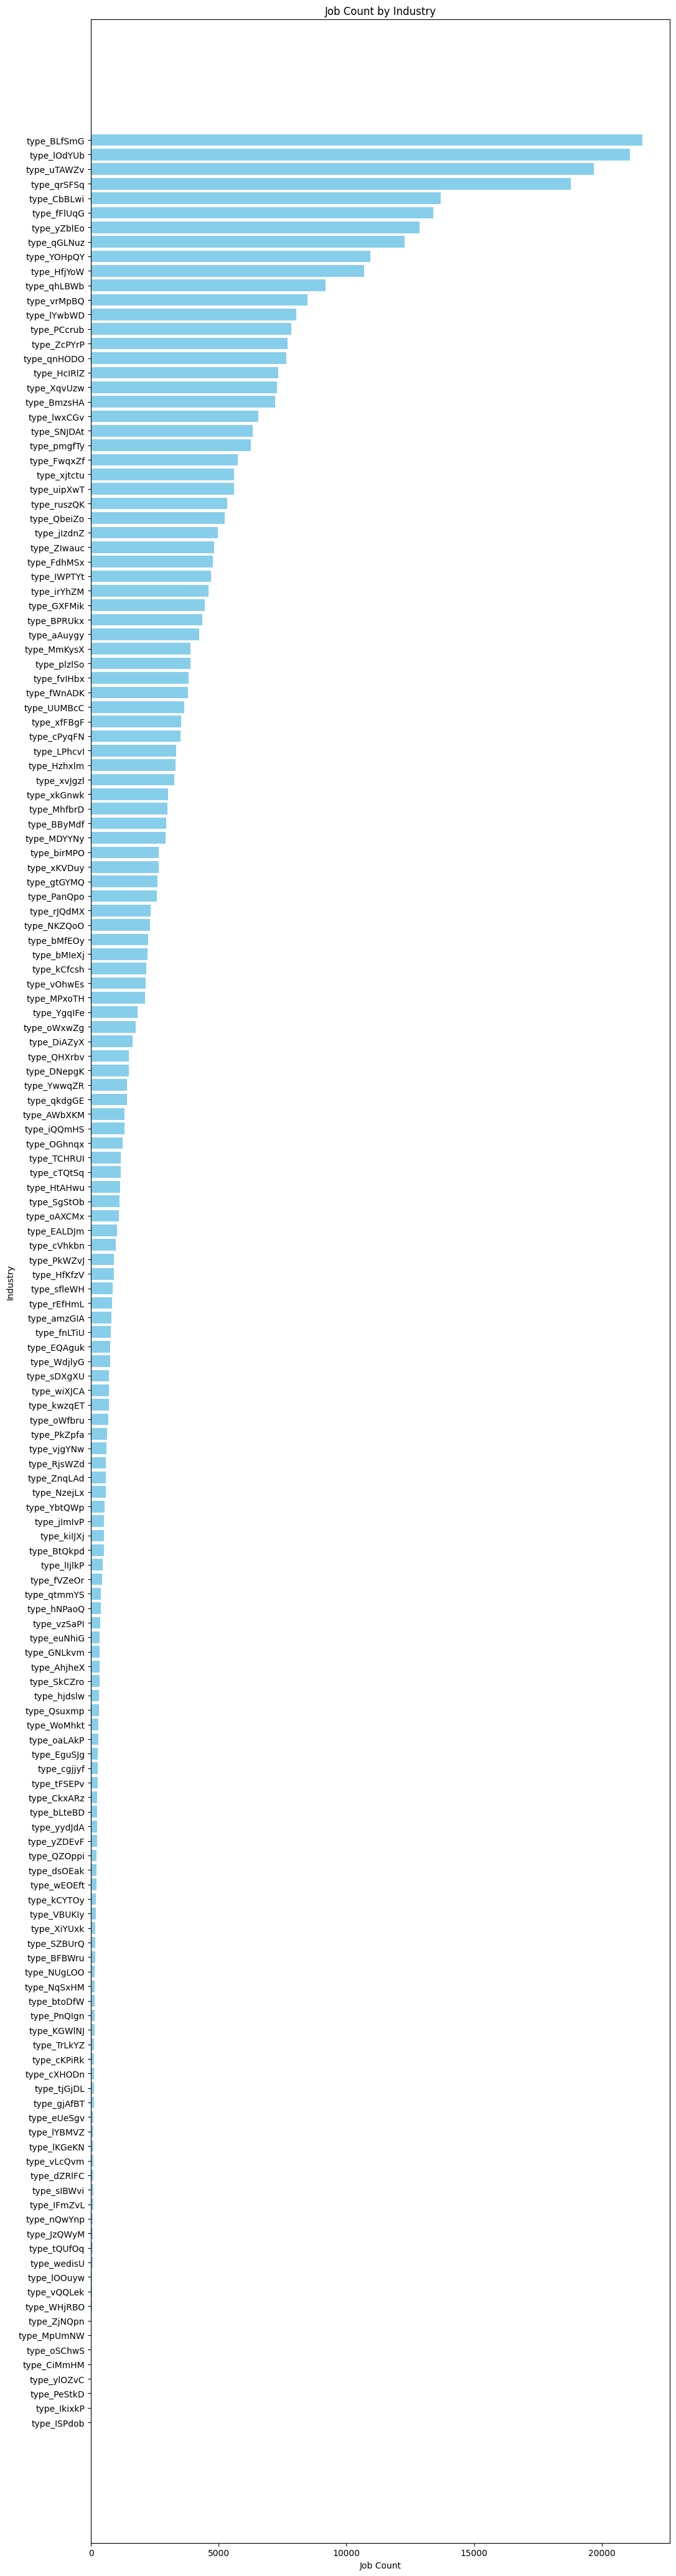

In [13]:
plt.figure(figsize=(12, len(industry_counts) / 3))
industry_counts = industry_counts.sort_values(by="JobCount", ascending=False)
plt.barh(industry_counts["companyType"], industry_counts["JobCount"], color="skyblue")
plt.xlabel("Job Count")
plt.ylabel("Industry")
plt.title("Job Count by Industry")
plt.gca().invert_yaxis()
plt.show()

## 按经验要求统计招聘信息数

In [14]:
experience_counts = df["experience"].value_counts().reset_index()
experience_counts.columns = ["experience", "JobCount"]

In [15]:
experience_counts

,experience,JobCount
0,EdD,146262
1,Eas,138165
2,Eqh,78077
3,EzN,30153
4,EKk,24162
5,Eby,9944
6,EaZ,3843
7,ESu,56
8,EkP,1
9,Emc,1


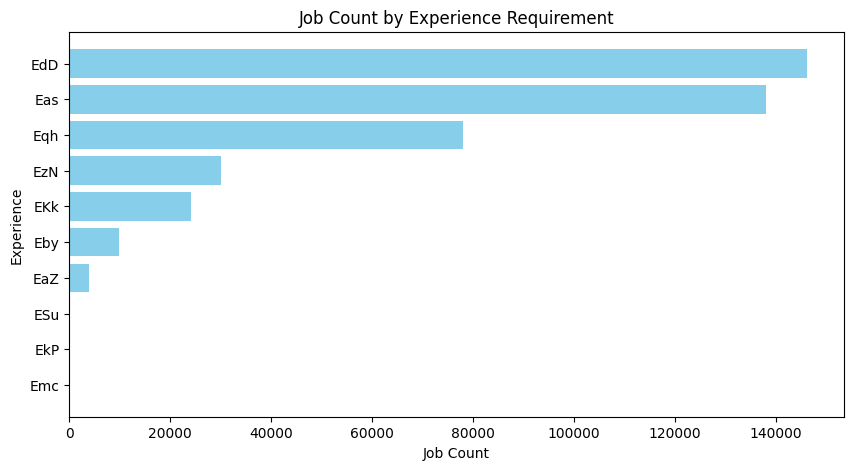

In [16]:
plt.figure(figsize=(10, len(experience_counts) / 2))
experience_counts = experience_counts.sort_values(by="JobCount", ascending=False)
plt.barh(
    experience_counts["experience"], experience_counts["JobCount"], color="skyblue"
)
plt.xlabel("Job Count")
plt.ylabel("Experience")
plt.title("Job Count by Experience Requirement")
plt.gca().invert_yaxis()
plt.show()

## 按学历要求统计招聘信息数

In [17]:
education_counts = df["education"].value_counts().reset_index()
education_counts.columns = ["education", "JobCount"]

In [18]:
education_counts

,education,JobCount
0,GI,136346
1,GP,120848
2,Gx,115120
3,Gy,23989
4,Go,21034
5,GZ,6942
6,Gh,5499
7,Gz,673
8,Gw,177
9,GJ,21


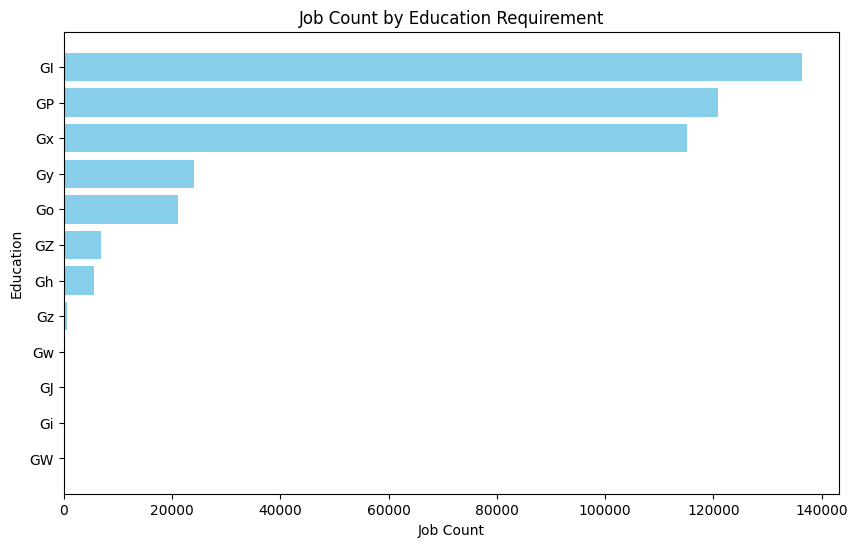

In [19]:
plt.figure(figsize=(10, len(education_counts) / 2))
education_counts = education_counts.sort_values(by="JobCount", ascending=False)
plt.barh(education_counts["education"], education_counts["JobCount"], color="skyblue")
plt.xlabel("Job Count")
plt.ylabel("Education")
plt.title("Job Count by Education Requirement")
plt.gca().invert_yaxis()
plt.show()

## 按企业统计招聘信息数

In [20]:
company_counts = df["company"].value_counts().reset_index()
company_counts.columns = ["company", "JobCount"]

In [21]:
company_counts

,company,JobCount
0,company_907432,485
1,company_390847,373
2,company_648838,366
3,company_678433,364
4,company_802784,290
...,...,...
267291,company_880364,1
267292,company_072948,1
267293,company_831783,1
267294,company_822090,1


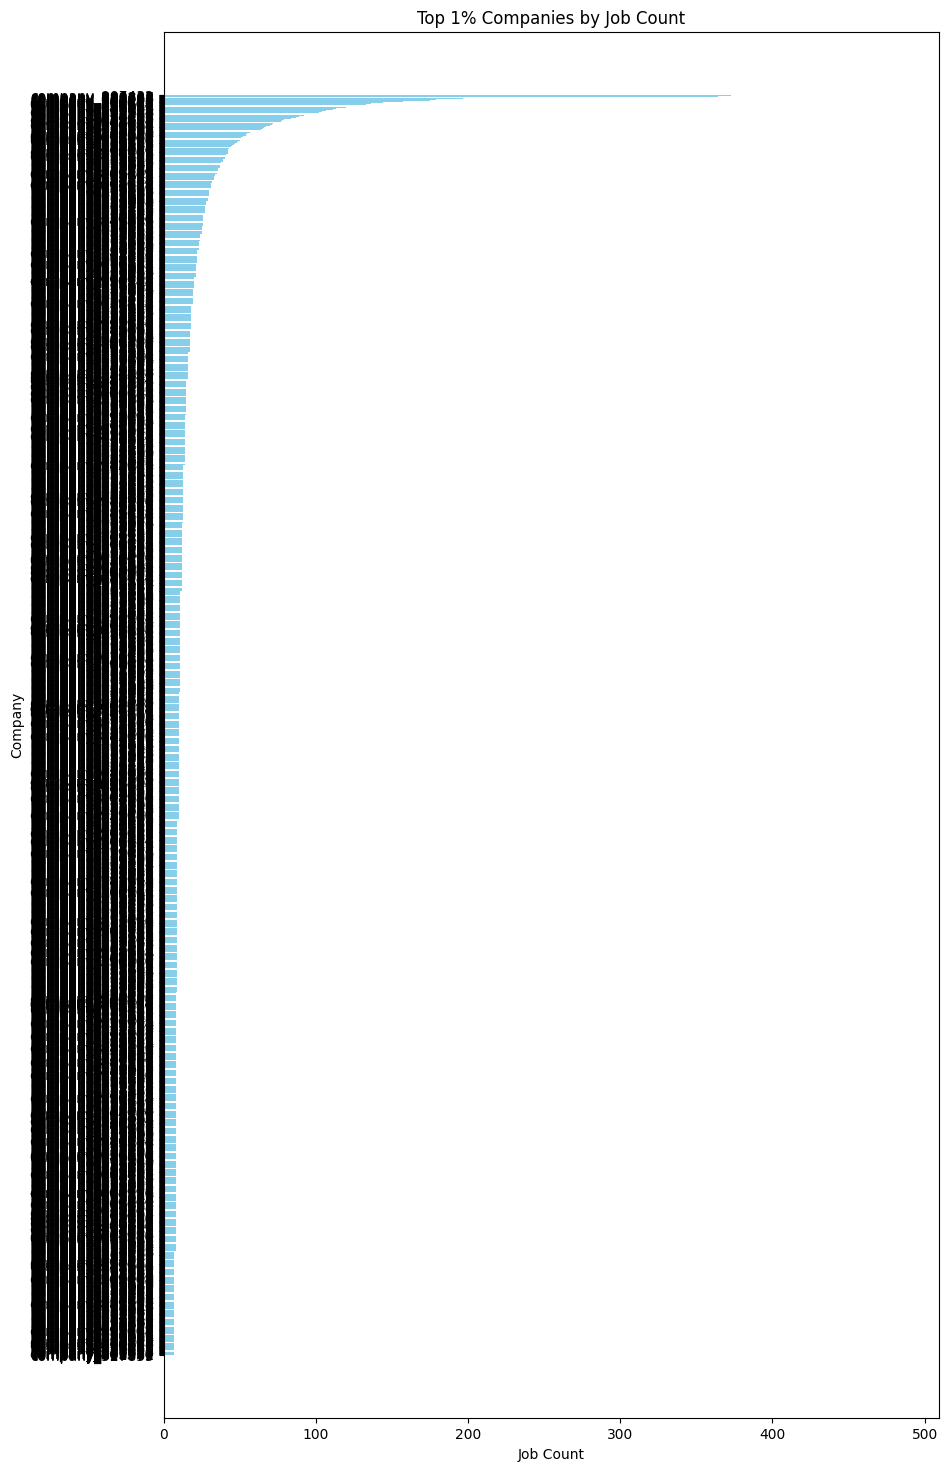

In [22]:
top_1_percent_count = int(len(company_counts) * 0.01)
top_1_percent_companies = company_counts.head(top_1_percent_count)
plt.figure(figsize=(10, 2 ^ 16))
top_1_percent_companies = top_1_percent_companies.sort_values(
    by="JobCount", ascending=False
)
plt.barh(
    top_1_percent_companies["company"],
    top_1_percent_companies["JobCount"],
    color="skyblue",
)
plt.xlabel("Job Count")
plt.ylabel("Company")
plt.title("Top 1% Companies by Job Count")
plt.gca().invert_yaxis()
plt.show()

## 统计薪酬字段

In [23]:
salary_counts = df["salary"].value_counts().reset_index()
salary_counts.columns = ["salary", "JobCount"]

In [24]:
salary_counts

,salary,JobCount
0,5-10K,25139
1,10-15K,22196
2,5-6K,17905
3,4-5K,17239
4,3-4K,17105
...,...,...
2769,8-9K·24薪,1
2770,6-8K·18薪,1
2771,19-25K·16薪,1
2772,2.3-3K,1


## 检查空值

In [25]:
missing_values = df.isnull().sum()
print("每个字段的空值数量:")
print(missing_values)
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("\n包含空值的字段及其对应的空值数量:")
    print(missing_values)
else:
    print("\n数据集中没有空值")

每个字段的空值数量:
JobTitle       0
city           0
salary         0
experience     0
education      0
company        0
companyType    0
dtype: int64

数据集中没有空值


# 过滤出前 1% 数量的招聘广告

In [30]:
job_title_counts = df["JobTitle"].value_counts().reset_index()
job_title_counts.columns = ["JobTitle", "JobCount"]

# 对职位数量进行排序，并确定前1%职位的数量下限
sorted_job_counts = job_title_counts["JobCount"].sort_values(ascending=False)
threshold_index = int(len(sorted_job_counts) * 0.01)
threshold_value = sorted_job_counts.iloc[threshold_index]

# 筛选出符合条件的职位
top_1_percent_jobs = job_title_counts[job_title_counts["JobCount"] >= threshold_value]

# 打印结果
print(f"前1%职位的数量下限: {threshold_value}")
print("符合条件的职位:")
top_1_percent_jobs

前1%职位的数量下限: 24
符合条件的职位:


,JobTitle,JobCount
0,bfbc45b05c5a4425210cd2cb3d84ae09GC,3358
1,c9a30a5443d04270fb0f49d437c3376bAy,2633
2,9e7afc7cdb61931eb7d2cc8398b80ecfSQ,2036
3,6be068c4e74275ca8ed9975805e2f763Em,2035
4,2006631955b0aa1d8a3bc1edc55e0754sn,1874
...,...,...
1708,849566bd2a989185a19431559058cf79Jf,24
1709,c0d78068ae3514edca0d2163bc05031caq,24
1710,f47a414431f32ccd9718632e62175a16ku,24
1711,a0d4f55504ecf6176dc4300abc42b055Jh,24


In [29]:
# 获取符合条件的职位名称列表
top_1_percent_job_titles = top_1_percent_jobs["JobTitle"].tolist()

# 根据筛选出的职位名称过滤原数据
filtered_df = df[df["JobTitle"].isin(top_1_percent_job_titles)]

# 保存筛选后的数据到新文件
output_file_path = "./data/filtered/Top1PercentJobWanted.csv"
filtered_df.to_csv(output_file_path, index=False)

print(f"筛选后的数据已保存到 {output_file_path}")

筛选后的数据已保存到 ./data/filtered/Top1PercentJobWanted.csv
